In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pyrtools as pt
%load_ext autoreload
%autoreload 2

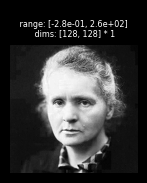

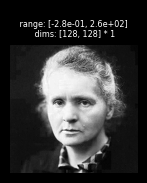

In [2]:
im=plt.imread('./Curie.pgm')
im=pt.blurDn(im,1,'qmf9')
pt.imshow(im)

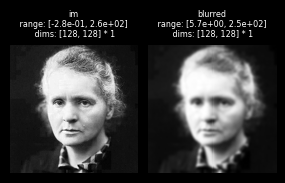

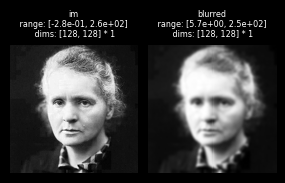

In [3]:
binom5=pt.binomial_filter(5)
lo_filt=binom5*binom5.T
blurred=pt.rconv2(im,lo_filt)

pt.imshow([im,blurred],title=['im','blurred'])

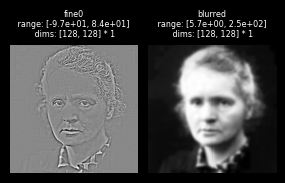

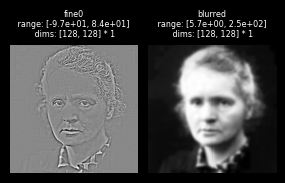

In [4]:
fine0=im-blurred
pt.imshow([fine0,blurred],title=['fine0','blurred'])

In [5]:
pt.image_compare(im,blurred+fine0)

Difference statistics:
  Range: [0, 0]
  Mean: 0.000000,  Stdev (rmse): 0.000000,  SNR (dB): 356.760055


(-7.105427357601002e-15,
 3.552713678800501e-15,
 1.5585406229479126e-18,
 1.1704526091612824e-16,
 356.76005487633176)

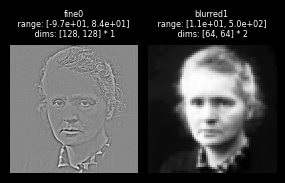

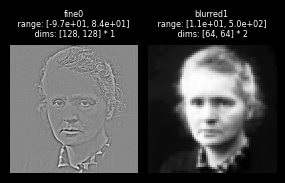

In [6]:
lo_filt=2*binom5*binom5.T
blurred1=pt.corrDn(image=im,filt=lo_filt,step=(2,2))
pt.imshow([fine0,blurred1],title=['fine0','blurred1'])

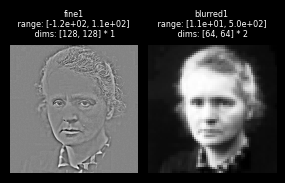

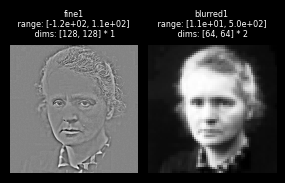

In [7]:
fine1=im-pt.upConv(image=blurred1,filt=lo_filt,step=(2,2))
pt.imshow([fine1,blurred1],title=['fine1','blurred1'])

In [8]:
recon=fine1+pt.upConv(image=blurred1,filt=lo_filt,step=(2,2),start=(0,0),stop=(256,256))
pt.image_compare(im,recon)

ValueError: operands could not be broadcast together with shapes (128,128) (256,256) 

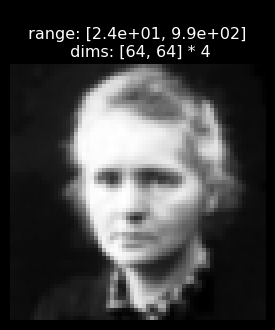

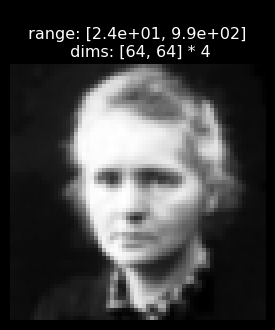

In [ ]:
blurred2=pt.corrDn(image=blurred1,filt=lo_filt,step=(2,2))
pt.imshow(blurred2,'auto',4)

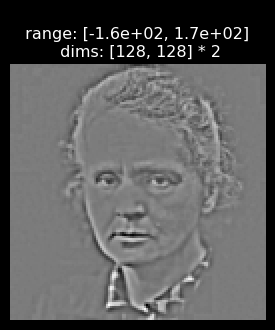

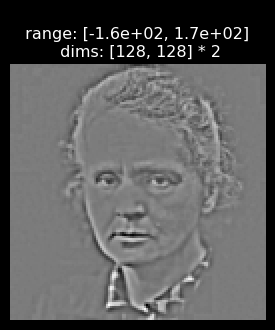

In [ ]:
fine2=blurred1-pt.upConv(image=blurred2,filt=lo_filt,step=(2,2))
pt.imshow(fine2,'auto',2)

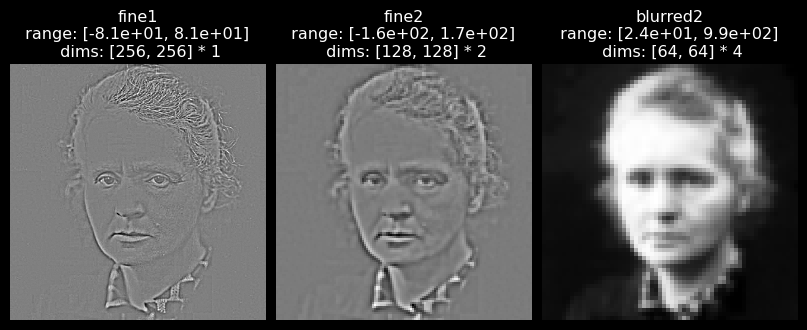

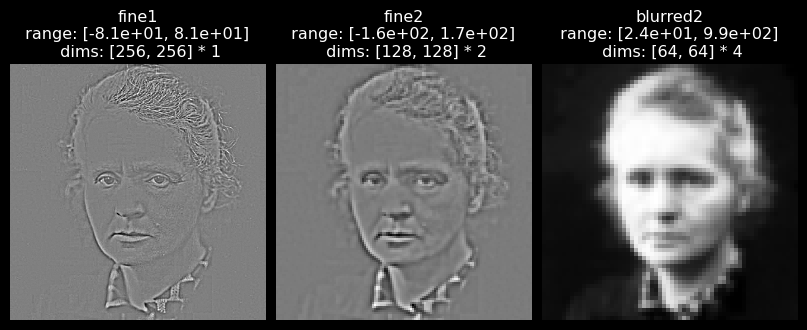

In [ ]:
pt.imshow([fine1,fine2,blurred2],title=['fine1','fine2','blurred2'],col_wrap=3)

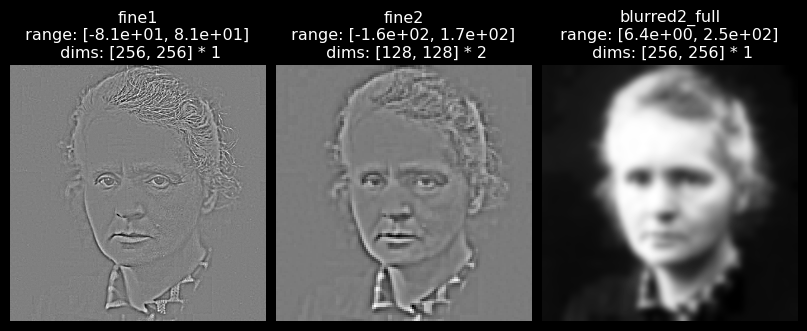

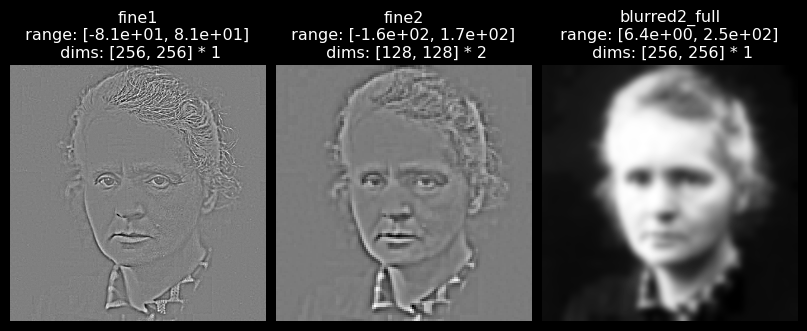

In [ ]:
blurred2_tmp=pt.upConv(image=blurred2,filt=lo_filt,step=(2,2))
blurred2_full=pt.upConv(image=blurred2_tmp,filt=lo_filt,step=(2,2))
pt.imshow([fine1,fine2,blurred2_full],title=['fine1','fine2','blurred2_full'],col_wrap=3)

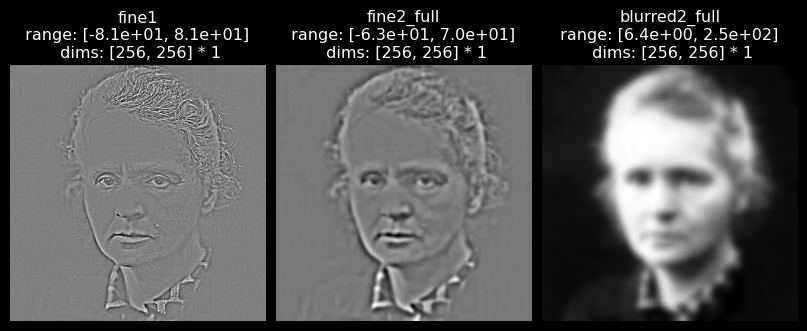

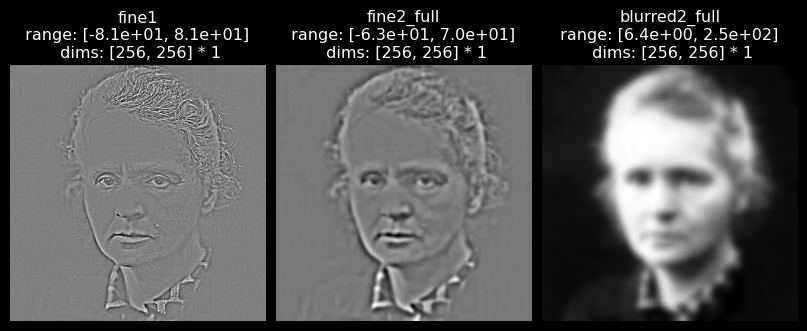

In [ ]:
fine2_full=pt.upConv(image=fine2,filt=lo_filt,step=(2,2))
pt.imshow([fine1,fine2_full,blurred2_full],title=['fine1','fine2_full','blurred2_full'],col_wrap=3)

In [ ]:
recon=blurred2_full+fine2_full+fine1
pt.image_compare(im,recon)

Difference statistics:
  Range: [0, 0]
  Mean: 0.000000,  Stdev (rmse): 0.000000,  SNR (dB): inf


(0.0, 0.0, 0.0, 0.0, inf)

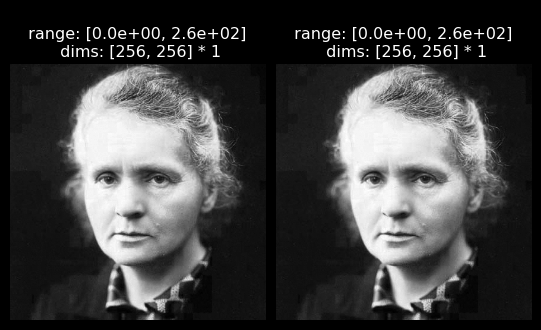

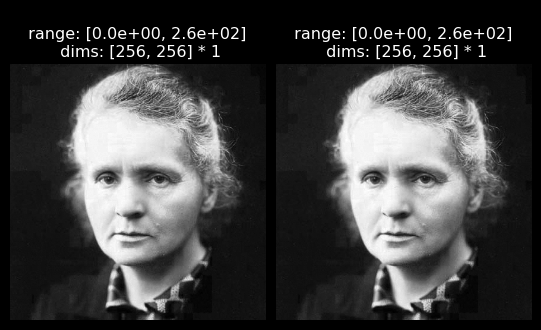

In [ ]:
pt.imshow([recon,im])

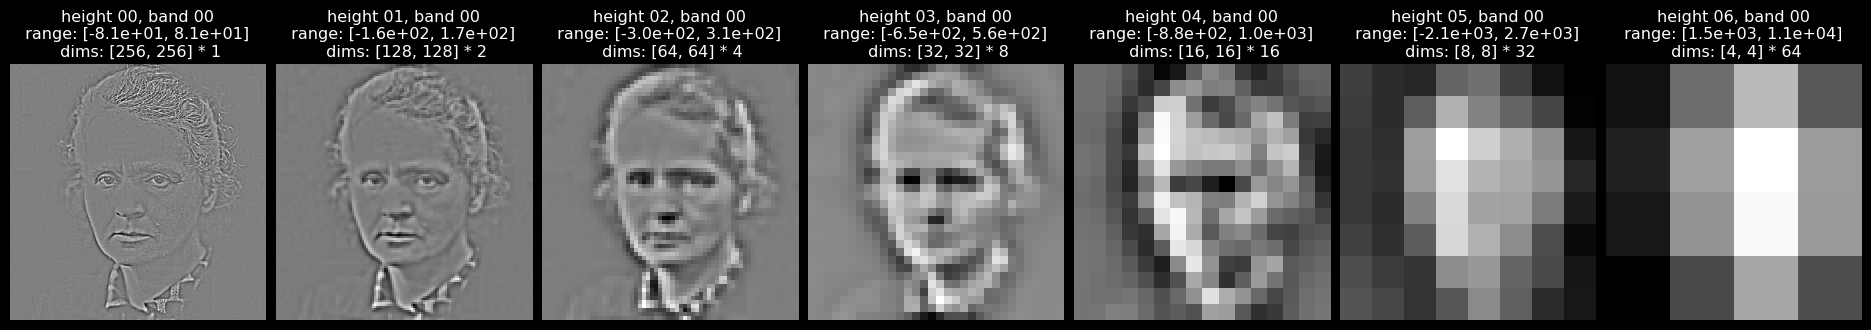

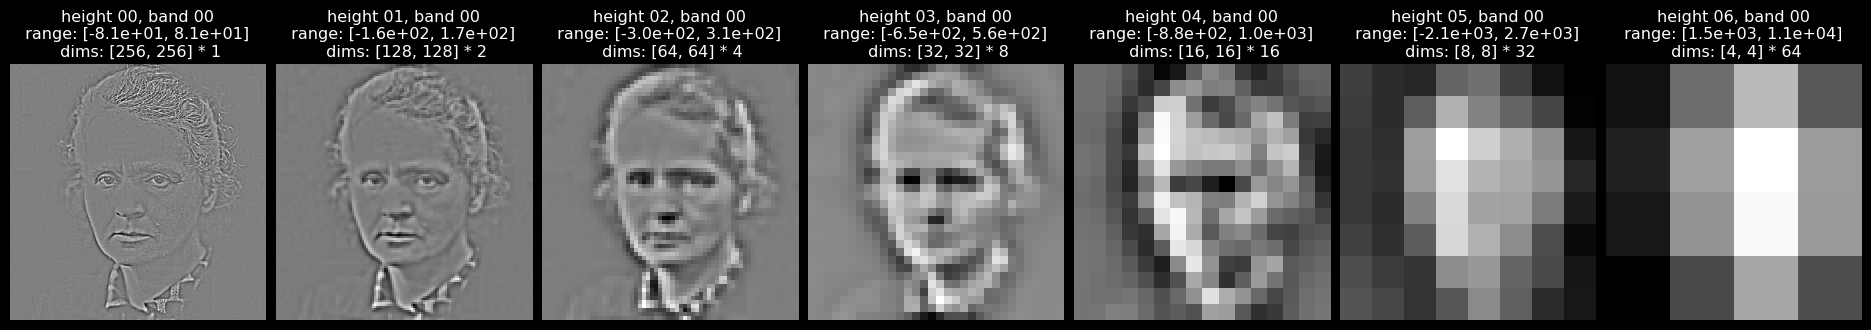

In [ ]:
pyr=pt.pyramids.LaplacianPyramid(im)
pt.pyrshow(pyr.pyr_coeffs)

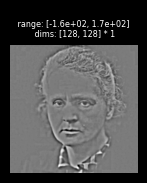

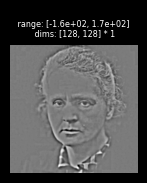

In [ ]:
pt.imshow(pyr.pyr_coeffs[(1,0)])

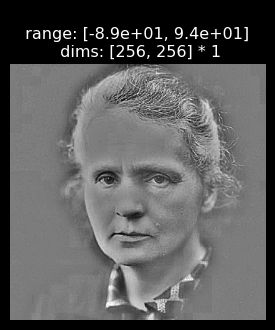

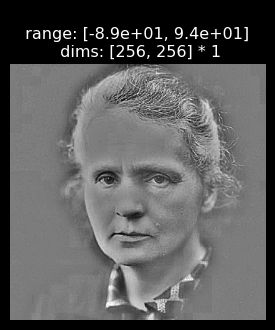

In [ ]:
pt.imshow(pyr.recon_pyr(levels=[0,2]))

Difference statistics:
  Range: [0, 0]
  Mean: -0.000000,  Stdev (rmse): 0.000000,  SNR (dB): 332.998412


(-2.1316282072803006e-14,
 2.842170943040401e-14,
 -8.836247705756861e-18,
 1.8095275148913132e-15,
 332.9984123245902)

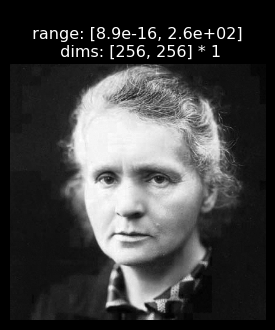

In [ ]:
fullres=pyr.recon_pyr()
pt.imshow(fullres)
pt.image_compare(im,fullres)

[[0.35355339]
 [0.70710678]
 [0.35355339]]
Difference statistics:
  Range: [0, 0]
  Mean: -0.000000,  Stdev (rmse): 0.000000,  SNR (dB): 335.975267


(-1.7763568394002505e-14,
 1.0658141036401503e-14,
 -2.0826846107088737e-16,
 1.2844655691494982e-15,
 335.97526680353474)

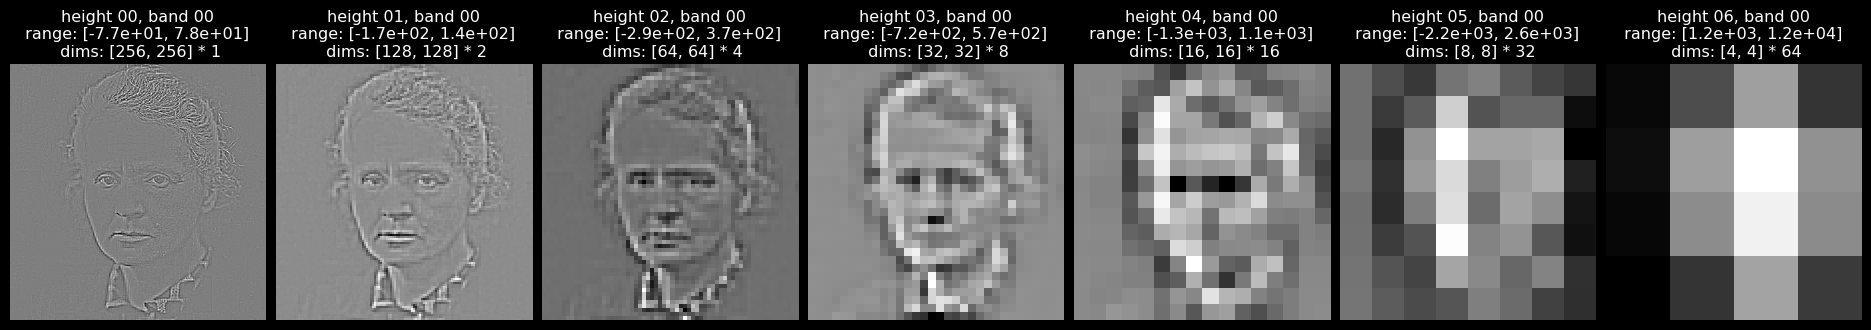

In [ ]:
print(pt.named_filter('binom3'))

pyr3=pt.pyramids.LaplacianPyramid(im,height=7,downsample_filter_name='binom3')
pt.pyrshow(pyr3.pyr_coeffs)

fullres=pyr3.recon_pyr(levels='all',upsample_filter_name='binom3')
pt.image_compare(im,fullres)

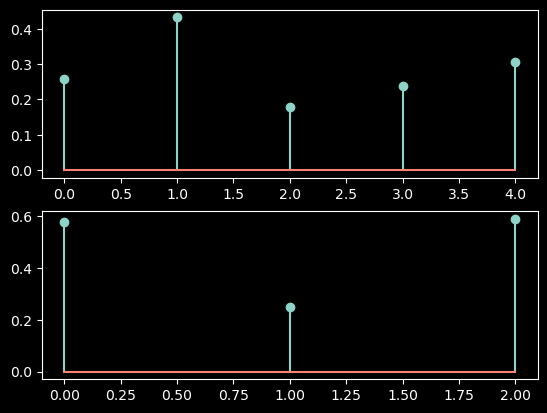

In [ ]:
filt1 = np.random.rand(5,)
filt1 = np.sqrt(2)*filt1/sum(filt1)
plt.subplot(2,1,1)
plt.stem(filt1)
plt.subplot(2,1,2)
filt2 = np.random.rand(3,)
filt2 = np.sqrt(2)*filt2/sum(filt2)
plt.stem(filt2)
plt.show()

Difference statistics:
  Range: [0, 0]
  Mean: -0.000000,  Stdev (rmse): 0.000000,  SNR (dB): 312.468450


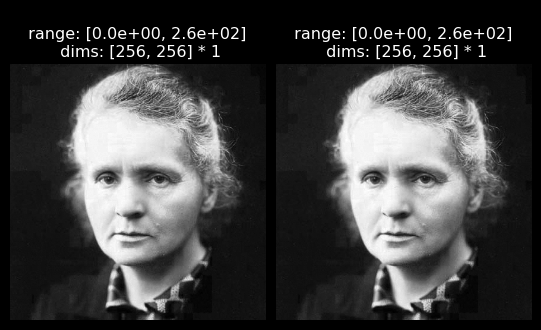

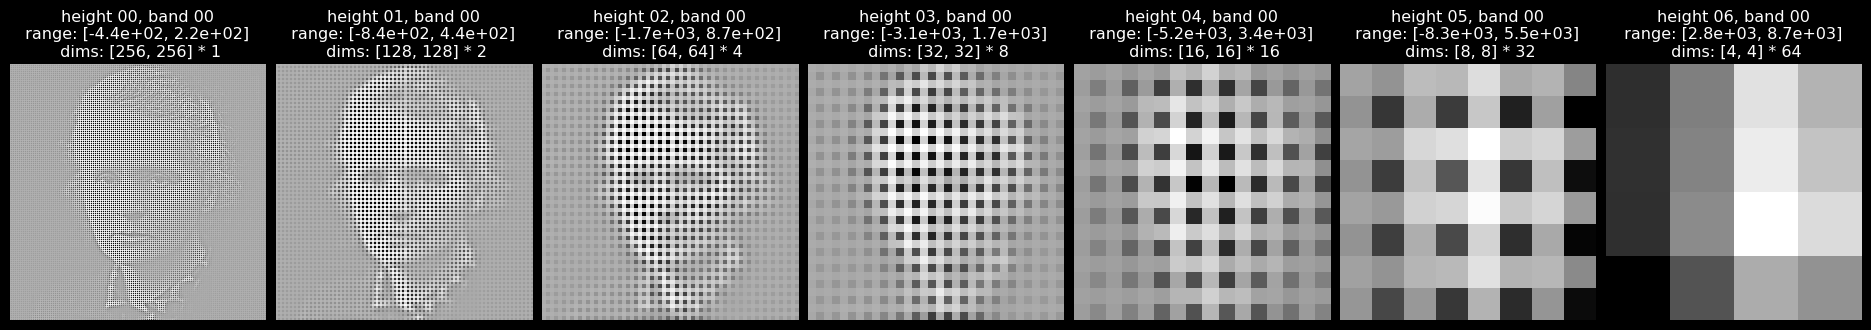

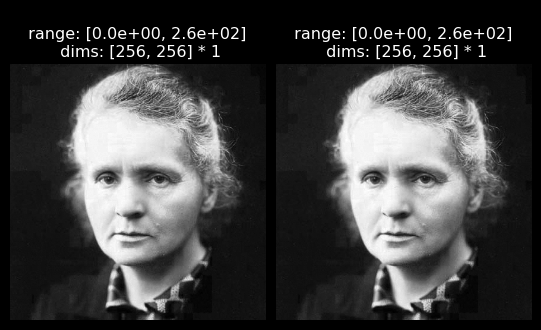

In [ ]:
pyrr = pt.pyramids.LaplacianPyramid(im, height=7,
                                    downsample_filter_name=filt1,
                                    upsample_filter_name=filt2)
pt.pyrshow(pyrr.pyr_coeffs)

fullresr = pyrr.recon_pyr(filt2)

pt.image_compare(im, fullresr)
pt.imshow([im, fullresr])